In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../input/cancer-classification/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

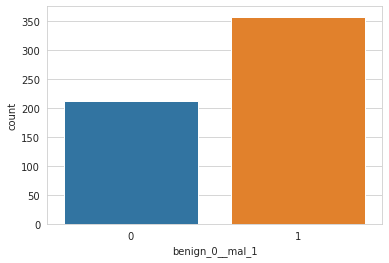

In [4]:
sns.countplot(x='benign_0__mal_1', data = df)

<AxesSubplot:>

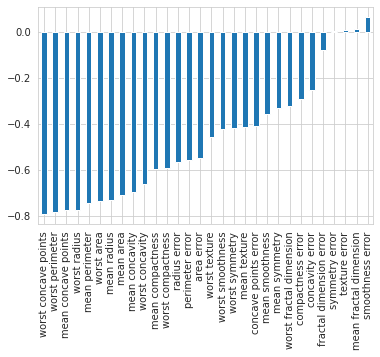

In [5]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind= 'bar')

In [6]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.fit_transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [14]:
X_train.shape

(426, 30)

In [15]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))


# Final output node for prediction
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

2022-07-20 15:51:15.388249: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test) ,batch_size= 128,epochs=600)


2022-07-20 15:51:15.584953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/600
4/4 [==============================] - 1s 90ms/step - loss: 0.7271 - accuracy: 0.3310 - val_loss: 0.7116 - val_accuracy: 0.4965
Epoch 2/600
4/4 [==============================] - 0s 20ms/step - loss: 0.7115 - accuracy: 0.4484 - val_loss: 0.6931 - val_accuracy: 0.5804
Epoch 3/600
4/4 [==============================] - 0s 17ms/step - loss: 0.6947 - accuracy: 0.5657 - val_loss: 0.6787 - val_accuracy: 0.6783
Epoch 4/600
4/4 [==============================] - 0s 16ms/step - loss: 0.6787 - accuracy: 0.6502 - val_loss: 0.6662 - val_accuracy: 0.8182
Epoch 5/600
4/4 [==============================] - 0s 17ms/step - loss: 0.6643 - accuracy: 0.7488 - val_loss: 0.6535 - val_accuracy: 0.8671
Epoch 6/600
4/4 [==============================] - 0s 16ms/step - loss: 0.6503 - accuracy: 0.8005 - val_loss: 0.6392 - val_accuracy: 0.8462
Epoch 7/600
4/4 [==============================] - 0s 16ms/step - loss: 0.6364 - accuracy: 0.8662 - val_loss: 0.6243 - val_accuracy: 0.8042
Epoch 8/600
4/4 [===

In [17]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

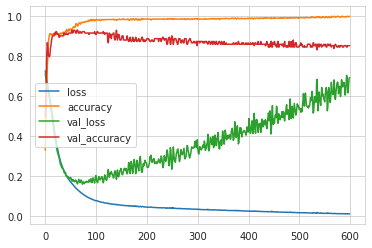

In [18]:
losses.plot()

In [19]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))


# Final output node for prediction
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=25)

In [22]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test) ,batch_size= 128,epochs=400,
         callbacks=[early_stop])


Epoch 1/400
4/4 [==============================] - 1s 72ms/step - loss: 0.7118 - accuracy: 0.3451 - val_loss: 0.7008 - val_accuracy: 0.4476
Epoch 2/400
4/4 [==============================] - 0s 16ms/step - loss: 0.6987 - accuracy: 0.4624 - val_loss: 0.6888 - val_accuracy: 0.5944
Epoch 3/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6864 - accuracy: 0.6056 - val_loss: 0.6772 - val_accuracy: 0.7063
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6739 - accuracy: 0.7136 - val_loss: 0.6655 - val_accuracy: 0.7902
Epoch 5/400
4/4 [==============================] - 0s 15ms/step - loss: 0.6618 - accuracy: 0.7817 - val_loss: 0.6531 - val_accuracy: 0.8182
Epoch 6/400
4/4 [==============================] - 0s 16ms/step - loss: 0.6504 - accuracy: 0.8216 - val_loss: 0.6410 - val_accuracy: 0.8462
Epoch 7/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6387 - accuracy: 0.8451 - val_loss: 0.6290 - val_accuracy: 0.8392
Epoch 8/400
4/4 [===

In [23]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

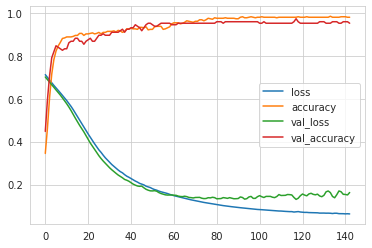

In [24]:
model_loss.plot()

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


# Final output node for prediction
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(x=X_train,y=y_train,validation_data=(X_test, y_test) ,batch_size= 128,epochs=400,
         callbacks=[early_stop])


Epoch 1/400
4/4 [==============================] - 1s 71ms/step - loss: 0.7414 - accuracy: 0.3967 - val_loss: 0.7113 - val_accuracy: 0.3846
Epoch 2/400
4/4 [==============================] - 0s 16ms/step - loss: 0.7282 - accuracy: 0.4249 - val_loss: 0.6981 - val_accuracy: 0.3846
Epoch 3/400
4/4 [==============================] - 0s 15ms/step - loss: 0.7153 - accuracy: 0.4272 - val_loss: 0.6870 - val_accuracy: 0.4056
Epoch 4/400
4/4 [==============================] - 0s 15ms/step - loss: 0.7062 - accuracy: 0.4601 - val_loss: 0.6772 - val_accuracy: 0.4336
Epoch 5/400
4/4 [==============================] - 0s 17ms/step - loss: 0.6910 - accuracy: 0.4742 - val_loss: 0.6676 - val_accuracy: 0.6224
Epoch 6/400
4/4 [==============================] - 0s 16ms/step - loss: 0.6830 - accuracy: 0.4953 - val_loss: 0.6582 - val_accuracy: 0.7413
Epoch 7/400
4/4 [==============================] - 0s 15ms/step - loss: 0.6699 - accuracy: 0.5188 - val_loss: 0.6491 - val_accuracy: 0.8112
Epoch 8/400
4/4 [===

In [27]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

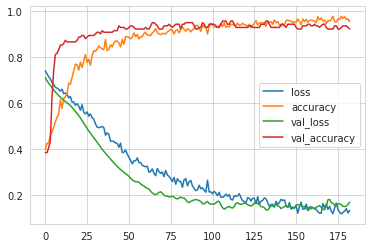

In [28]:
model_loss.plot()

In [29]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [30]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        55
           1       0.99      0.89      0.93        88

    accuracy                           0.92       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



In [33]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [10 78]]
